## CSV to `GeoDataFrame`

Let’s start by importing packages and updating viewing options:


In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt


# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

In [2]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

# Drop first column
power_plants = power_plants.drop(columns='unnamed: 0')

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


In [3]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )

<AxesSubplot:>

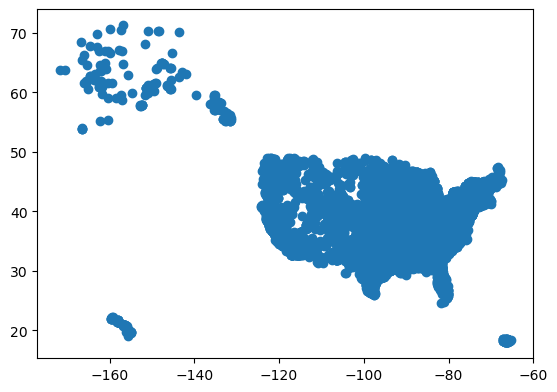

In [4]:
power_plants.plot()  

## f-strings

So far, we have printed variables using string concatenation inside the `print()` function: we use commas to separate every vairable and string that we want to print. Example:

In [5]:
print('CRS:', power_plants.crs)

CRS: EPSG:4269


Another popular way to mix variables an strings in print statements is by creating **f strings**, 'formatted strings'

Simplest syntax
```python
f'"some text {replace}"
```
where `replace` can be a variable, na expression, a function or method cell

In [6]:
print(f"ellipsoid: {power_plants.crs.ellipsoid}")

ellipsoid: GRS 1980


In [7]:
# Use f strings inside the print function
print(f"datum: {power_plants.crs.datum}")

datum: North American Datum 1983


Advantages of using f strings is a lot of customization for formatting output

In [8]:
# Set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {power_plants.crs.is_projected}") 

Is the CRS geographic?:   True
Is the CRS projected?:    False


## Import shapefile

In [9]:
os.getcwd()

'/Users/mmyiv/MEDS/EDS-220/eds220-2024-in-class'

In [10]:
# Create absolute file path
fp = os.path.join('/',
                  'courses',
                  'EDS220',
                  'data',
                  'tl_2022_us_state',
                  'tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names 
states.columns = states.columns.str.lower()

states.head(3)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/share/proj failed


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


epsg:4269


<AxesSubplot:>

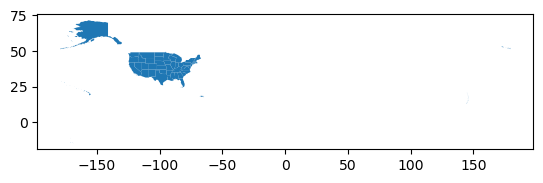

In [11]:
print(states.crs)
states.plot()

## For loops

It can be easier to work with the codes as numbers instead of strings, so let’s update the corresponding columns in the states geo-dataframe. 
We start by checking the data type of the `region`, `division`, and `statefp` columns:

In [12]:
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


This is inconvenient as it repeats the same pieces of code, only changing the column name. Instead, using the `for` loop allows us to succintly print the same information:

In [13]:
code_cols = ['region', 'division', 'statefp']
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


`for` loops excecute a block of code a fixed number of times, iterating over a set of objects. In this case, we iterate over the list of column names.

**DRY code** 
DRY = don't repeat yourself is a core programming principle that encourages reducing redundancy and consolidating repeated logic. If you need to repeat the same code more than twice, you probably need a for loop.

Next, update the data type of the code columns to be integers. This time, we verify the data type of a column using the `is_numeric_dtype()` and `assert` statement

In [14]:
# Update code column into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])

The `assert` keyword does nothing if the expression next to it evaluates to True and raises an `AssertionError` exception and stops your code form running any further. For example,

In [15]:
# Does nothing if statement is True
assert 2+2 == 4

# Raises an error if statement is False
assert 2+2 == 3

AssertionError: 

## Data selection
For this lesson, we want to use only the contiguous states. As seen in the plot, the data covers a bigger extension.

### Check in
- What are the unique values for region, division, or state codes in the data?
- Which codes should should we select to keep only states in the contiguous US?

In [16]:
states.region.unique()

array([3, 2, 1, 4, 9])

Hawaii and Alaska have codes 2, 15 & region 9 should be excluded.

In [17]:
# Select contiguous US states
contiguous = states[(states.region!=9) & (~states.statefp.isin([2,15]))]
# ~states.statefp.isin([2,15]) # ~ = not in this list. complement.

<AxesSubplot:>

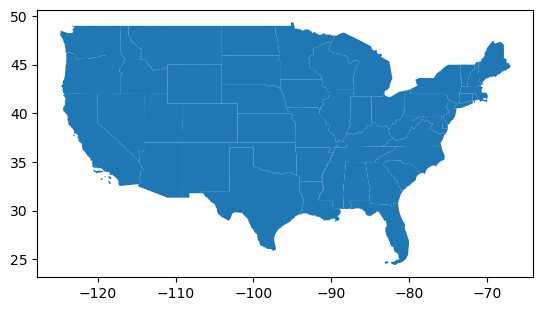

In [18]:
contiguous.plot()

The `~` tilde symbol is used in Python to negate a statement. So the previous line could be read as “the values in df’s column which are not in the list `[val1, val2, val3]`.”

## Check in
Select the data in the power_plants data frame for the contiguous US states.

In [19]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico','Hawaii','Alaska'])]
power_plants

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)
5,11575,10,Greene County,195,Alabama Power Co,Electric Utility,Highway 43,Demopolis,Greene,Alabama,36732.0,natural gas,Natural Gas = 1256.1 MW,Natural Gas Fired Combustion Turbine; Natural ...,1288.4,1256.1,NaN,NaN,NaN,NaN,NaN,NaN,1256.1,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.781100,32.601700,POINT (-87.78110 32.60170)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12004,23573,66723,Sawtell Solar,65736,"Sawtell Solar, LLC",IPP Non-CHP,NaN,NaN,NaN,North Carolina,NaN,solar,Solar = 3 MW,Solar Photovoltaic,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-82.375953,35.380139,POINT (-82.37595 35.38014)
12005,23574,66724,Southwick Solar,65737,"Southwick Solar, LLC",IPP Non-CHP,NaN,NaN,NaN,North Carolina,NaN,solar,Solar = 3 MW,Solar Photovoltaic,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-79.367698,36.009321,POINT (-79.36770 36.00932)
12006,23575,66725,Whiskey Solar,65738,"Whiskey Solar, LLC",IPP Non-CHP,NaN,NaN,NaN,North Carolina,NaN,solar,Solar = 5 MW,Solar Photovoltaic,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-79.736312,35.273434,POINT (-79.73631 35.27343)
12007,23576,66729,(3K) 59 Hetcheltown Rd,64872,"Distributed Solar Development, LLC",IPP Non-CHP,NaN,NaN,NaN,New York,NaN,solar,Solar = 1.4 MW,Solar Photovoltaic,1.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-73.910480,42.876570,POINT (-73.91048 42.87657)


## Plotting
Before we plot our data, let’s make sure they are in the same CRS:

In [20]:
contiguous.crs == power_plants.crs

True

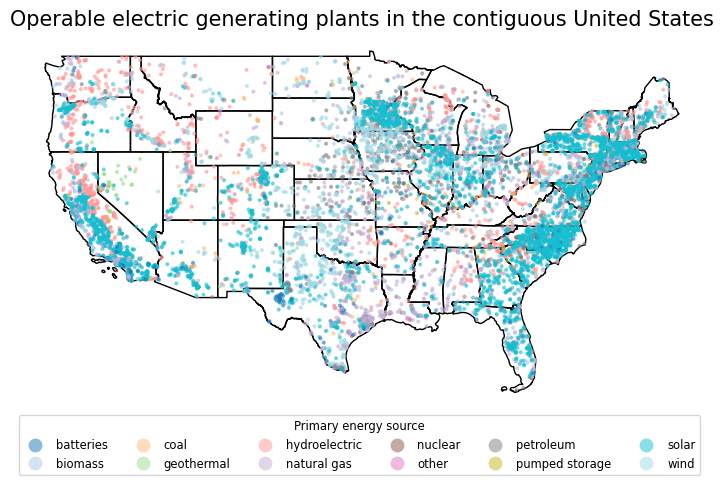

In [23]:
fig, ax = plt.subplots(figsize=(9,5))

# Remove the axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Operable electric generating plants in the contiguous United States', 
              fontsize=15)

# Add states
contiguous.plot(ax=ax,
               color = 'none',
               edgecolor = 'black')
# Add electric power plants colored by energy source

power_plants.plot(ax=ax,
                  column = 'primsource',
                 legend=True,
                 markersize=4,
                 cmap='tab20',
                 alpha=0.5,
                 legend_kwds={
                     'title': 'Primary energy source',
                    'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',
                      'bbox_to_anchor': (0, 0), # lower left corner of plot
                      'ncol': 6})

plt.show()

We also controlled the legend location using `loc` and `bbox_to_anchor` in the legend_kwds:

- `loc` indicates the **corner** of the legend we want to use for placement, and
- bbox_to_anchor is a tuple with coordinates indicating where to place the corner specified in `loc` relative to the axes. Values between 0 and 1 are within the axes.